In [99]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [66]:
flaubert_data = pd.read_csv('data/parsed.csv')

In [67]:
flaubert_data.head()

,chapter,folio,margins,margins_no_struck,margins_struck,metadata,previous,previous_no_struck,previous_struck,struck,text,underlined,version
0,NaN,NaN,NaN,NaN,NaN,NaN,Madame Bovary ____________ 19 7bre 1851.,Madame Bovary ____________ 19 7bre 1851.,NaN,NaN,Madame Bovary ____________ 19 7bre 1851.,NaN,1
1,NaN,2v,NaN,NaN,NaN,"I, chap 7 : La levrette Djali - brouillons, vo...",à Dieppe entendre des chanteurs Montagnards,à Dieppe entendre des chanteurs Montagnards,NaN,NaN,à Dieppe entendre des chanteurs Montagnards,NaN,1
2,1.0,3,allait puis cela en dôme tendu à 2 1 c'était d...,allait puis cela en dôme tendu à 2 1 c'était d...,ement lâche qu'il présenta au maître d'études ...,"I, chap. 1 : L'entrée de Charles au collège : ...",Madame Bovary. I. Une heure trois et demie ven...,Madame Bovary. I. Une heure et demie venaient ...,trois et le maître d'études attendait le petit...,ement lâche trois et le maître d'études attend...,allait puis cela en dôme tendu à 2 1 c'était d...,des moyens nouveau nouveau,1
3,1.0,3v,ce fut un vacarme suprême. on comme un flot dé...,ce fut un vacarme suprême. comme un flot débor...,"on puis com par peut à m alors, comme une band...","I, 1 : L'entrée de Charles au collège - Brouil...",- ce fut un vacarme suprême - les rires ... et...,- ce fut un vacarme suprême - les rires ... et...,comme veut prendre laissé un on allait ce s*/r...,"on puis com par par peut à m alors, comme une ...",ce fut un vacarme suprême. on comme un flot dé...,NaN,1
4,1.0,4,de Rouen des moyens comme toujours ainsi que d...,de Rouen ainsi que d'usage chacun Mr Roger der...,"des moyens comme toujours ""Mr Roger fort envir...","I, 1 : L'entrée de Charles au collège - Brouil...",Madame Bovary I. de Rouen Une heure et demie v...,Madame Bovary I. Une heure et demie venaient d...,de Rouen comme toujours Mr Roger l'étude des j...,de Rouen de des moyens comme toujours comme to...,Madame Bovary I. de Rouen Une heure et demie v...,des moyens nouveau et et le nouveau,1


In [68]:
flaubert_text = flaubert_data[['text', 'version']]

In [69]:
flaubert_text.head()

,text,version
0,Madame Bovary ____________ 19 7bre 1851.,1
1,à Dieppe entendre des chanteurs Montagnards,1
2,allait puis cela en dôme tendu à 2 1 c'était d...,1
3,ce fut un vacarme suprême. on comme un flot dé...,1
4,Madame Bovary I. de Rouen Une heure et demie v...,1


In [80]:
import string

def flaubert_combine_versions_on_text(data):
    
    ## A list of the versions that we are working with
    versions = ['1', '2', '3', '4', '5', '6', 'C', 'D']
    
    ## Removing all the numbers in the text column -- there are a few instances of numbers that occur from the metadata
    
    data['text'] = data['text'].str.replace('\d+', '')
    
    
    
    ##Removing all null values in the text column (generally blank pages)
    
    data['text'] = data['text'].dropna()
    
    def remove_punctuations(text):
          return str(text).translate(str.maketrans('', '', string.punctuation))

    data["text"] = data['text'].apply(remove_punctuations)
    
    def lower_case(text):
        return text.lower()
    
    data['text'] = data['text'].apply(lower_case)
    
    ## Generating a dataframe with the respective text data of each version

    version_1 = data[data['version'] == '1']
    version_2 = data[data['version'] == '2']
    version_3 = data[data['version'] == '3']
    version_4 = data[data['version'] == '4']
    version_5 = data[data['version'] == '5']
    version_6 = data[data['version'] == '6']
    version_C = data[data['version'] == 'C']
    version_D = data[data['version'] == 'D']
    
    ## Joining the text of the different versions together, turning all data into string form,
    ## and removing all punctuation
    version_1 = ' '.join([x for x in version_1.text])
    version_2 = ' '.join([x for x in version_2.text])
    version_3 = ' '.join([x for x in version_3.text])
    version_4 = ' '.join([x for x in version_4.text])
    version_5 = ' '.join([x for x in version_5.text])
    version_6 = ' '.join([x for x in version_6.text])
    version_C = ' '.join([x for x in version_C.text])
    version_D = ' '.join([x for x in version_D.text])
    
    ## Generating the new dataframe from this group of disjointed text
    
    data = {'version': versions,
        'text': [version_1, version_2, version_3, version_4, version_5, version_6, version_C, version_D]}
    
    print("There are", len(data['text']),
          "versions in your new dataframe with book lengths between",
          max(len(t) for t in data['text']), "and", 
          min(len(t) for t in data['text']), "words.")
    
    return pd.DataFrame(data=data)

In [83]:
flaubert_version = flaubert_combine_versions_on_text(flaubert_data)
flaubert_version

There are 8 versions in your new dataframe with book lengths between 1411998 and 718807 words.


,version,text
0,1,madame bovary bre à dieppe entendre des cha...
1,2,blainville crevon buchy quincampoix la boissiè...
2,3,tout lui parut être autour delle enveloppé pa...
3,4,elle avait peur den perdre qque chose où mêm...
4,5,iii ii lestiboudois hippolyte doit paraître ...
5,6,avis c sorte quemma cet avertissement était u...
6,C,bon à composer en envoyer les épreuves à mr d...
7,D,– madame bovary – –– à louis bouilhet i prem...


In [88]:
len(flaubert_version['text'][0])

1176579

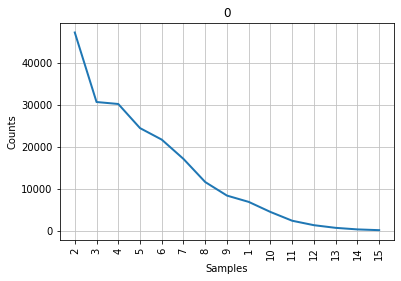

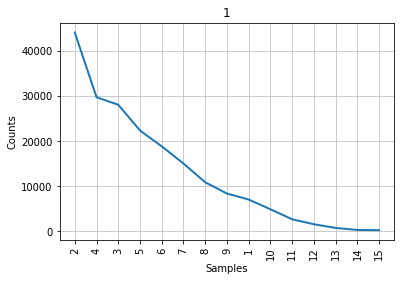

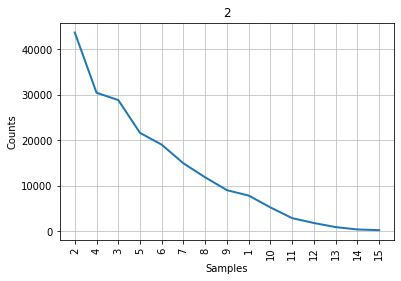

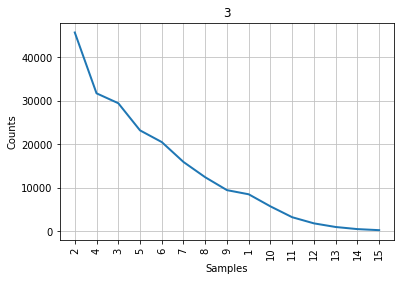

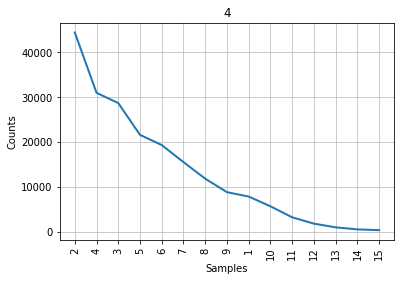

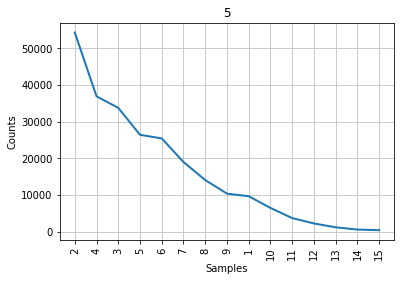

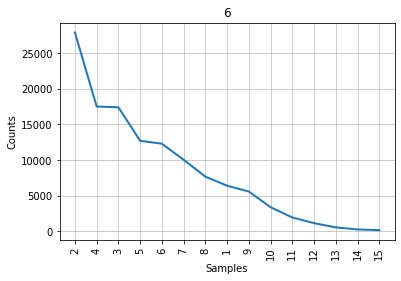

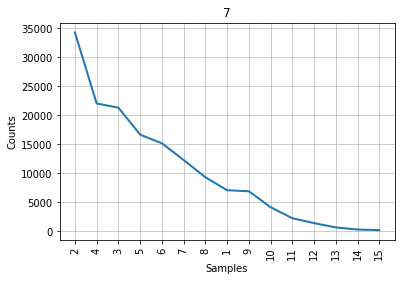

In [119]:
import nltk

#Create a dictionary of the different versions.
versions = {0, 1, 2, 3, 4, 5, 6, 7}

# Transform the different versions into tokens
version_tokens = {}
version_length_distributions = {}
for version in versions:
    tokens = nltk.word_tokenize(flaubert_version['text'][version], language='french')

   
    # Get a distribution of token lengths
    token_lengths = [len(token) for token in tokens]
    version_length_distributions[version] = nltk.FreqDist(token_lengths)
    version_length_distributions[version].plot(15, title=version)
